# Part1 : Clothing company

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori , association_rules


In [68]:
dataset = [
    
           ['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

           ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

           ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

           ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

           ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']
          
]

In [69]:
dataset

[['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
 ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
 ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
 ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
 ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

# 1. Data Preprocessing

In [70]:
#Transformer
encoder = TransactionEncoder()
dataset = encoder.fit_transform(dataset)

dataset


array([[False, False,  True, False, False,  True, False,  True, False,
         True,  True, False],
       [False, False,  True, False, False,  True, False, False, False,
         True,  True,  True],
       [ True, False, False,  True, False,  True,  True,  True, False,
        False, False, False],
       [ True,  True,  True,  True,  True, False, False,  True, False,
        False, False, False],
       [False,  True, False, False, False,  True, False,  True,  True,
         True, False, False]])

In [71]:
dataset = pd.DataFrame(dataset, columns=encoder.columns_)

dataset

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


#  2. Apriori Algorithm

### Support Code

In [72]:
frequent_items=apriori(dataset , min_support=0.6, use_colnames=True)
frequent_items

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Pants, Skirt)"


### Confidence Code 

In [73]:
association_rules(frequent_items, metric='confidence' ,min_threshold=0.7 )

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


### Lift Code

In [74]:
association_rules(frequent_items, metric='lift' ,min_threshold=1.25 )

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


# 3. Analysis

      -the most frequent items are pants and a scarf 
      -there is a  high chance to buy pants after buying a skirt 
      -it's more likly to buy pants and skirt together 


# Part2: Market_Basket_Optimisation

In [75]:
# import dataset 
data = pd.read_csv('Market_Basket_Optimisation.csv',header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# dataset shape
data.shape

(7501, 20)

# 1. Visualization 

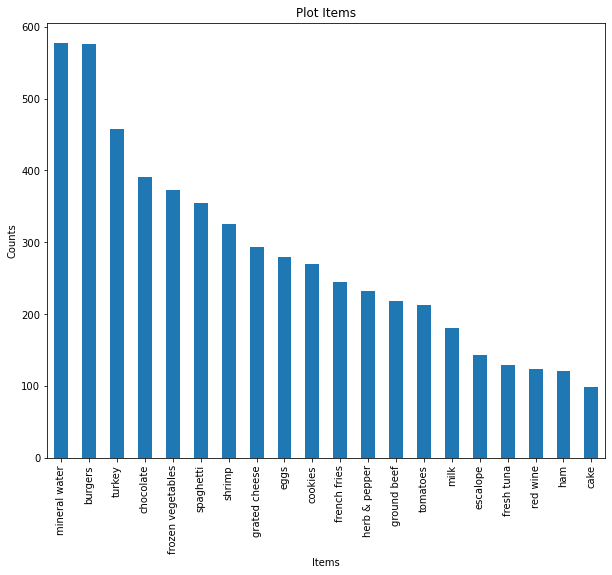

In [77]:
plt.figure(figsize=(10,8))
data[0].value_counts().head(data.shape[1]).plot.bar()
plt.title(' Items Plot')
plt.ylabel('Counts')
plt.xlabel('Items')
plt.show()

# 2. Preprocessing

In [78]:
dataset = []

for i in range (0,data.shape[0]):
    dataset.append([str(data.values[i,j]) for j in range (0, data.shape[1])])

In [79]:
# Transformer 
encoder = TransactionEncoder()
dataset = encoder.fit_transform(dataset)

In [80]:
dataset = pd.DataFrame(dataset, columns=encoder.columns_)
dataset.drop('nan', axis=1, inplace=True)

In [81]:
dataset

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 3. apriori algorithm

### Support code 

In [110]:
frequent_items= apriori(dataset, min_support=0.003 , use_colnames=True)
frequent_items

,support,itemsets
0,0.020397,(almonds)
1,0.008932,(antioxydant juice)
2,0.004666,(asparagus)
3,0.033329,(avocado)
4,0.004533,(babies food)
...,...,...
1438,0.003066,"(mineral water, pancakes, ground beef, spaghetti)"
1439,0.003066,"(mineral water, spaghetti, tomatoes, ground beef)"
1440,0.003333,"(mineral water, spaghetti, olive oil, milk)"
1441,0.003066,"(mineral water, spaghetti, shrimp, milk)"


### Confidence & Lift Code

In [111]:
rules =association_rules(frequent_items , metric='lift' , min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(almonds),(burgers),0.020397,0.087188,0.005199,0.254902,2.923577,0.003421,1.225089
1,(burgers),(almonds),0.087188,0.020397,0.005199,0.059633,2.923577,0.003421,1.041724
2,(almonds),(cake),0.020397,0.081056,0.003066,0.150327,1.854607,0.001413,1.081527
3,(cake),(almonds),0.081056,0.020397,0.003066,0.037829,1.854607,0.001413,1.018117
4,(chocolate),(almonds),0.163845,0.020397,0.005999,0.036615,1.795099,0.002657,1.016834
...,...,...,...,...,...,...,...,...,...
4875,"(milk, tomatoes)","(mineral water, spaghetti)",0.013998,0.059725,0.003333,0.238095,3.986501,0.002497,1.234110
4876,(mineral water),"(spaghetti, tomatoes, milk)",0.238368,0.005866,0.003333,0.013982,2.383631,0.001935,1.008231
4877,(spaghetti),"(mineral water, milk, tomatoes)",0.174110,0.006532,0.003333,0.019142,2.930353,0.002196,1.012856
4878,(tomatoes),"(mineral water, spaghetti, milk)",0.068391,0.015731,0.003333,0.048733,3.097846,0.002257,1.034692


In [112]:
rules[(rules ['lift'] >= 5) & (rules['confidence'] >= 0.3 )]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4205,"(mineral water, whole wheat pasta)",(olive oil),0.009599,0.065858,0.003866,0.402778,6.115863,0.003234,1.564145
4735,"(soup, frozen vegetables)","(mineral water, milk)",0.007999,0.047994,0.003066,0.383333,7.987176,0.002682,1.543794


# 4. Analysis

      -mineral water is the most frequent items
      -there is a  high chance to buy whole wheat pasta  after buying  mineral water  
      -it's more likly to buy mineral water,  whole wheat pasta and olive oil   together

